In [2]:
# https://openskynetwork.github.io/opensky-api/rest.html
# This is the open sky network, which has great coverage in the US and Europe
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [9]:
url = "https://opensky-network.org/api"
route = "/states/all"
res = requests.get(f"{url}{route}")
print(res.status_code)
data = res.json()

200


In [20]:
# A lot of data is returned
df = pd.DataFrame(data["states"])
df = df.iloc[:,:7]
df.columns = [
    "icao24",
    "callsign",
    "origin_country",
    "time_position",
    "last_contact",
    "longitude",
    "latitude",
]
df

,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude
0,a89ea5,N6545H,United States,1.712153e+09,1712152585,-101.7007,32.5913
1,ab1644,UAL2041,United States,1.712153e+09,1712152586,-104.7760,40.5913
2,a58211,N454MF,United States,1.712152e+09,1712152448,-91.8565,34.5340
3,ac1c12,N88G,United States,1.712153e+09,1712152585,-81.1057,26.4668
4,80162a,IGO7238,India,1.712153e+09,1712152585,79.2362,11.6798
...,...,...,...,...,...,...,...
8537,398551,FHBKR,France,1.712153e+09,1712152585,-1.0064,43.3406
8538,458664,CAT503,Denmark,1.712153e+09,1712152585,-3.7048,40.1380
8539,a9607d,JBU1067,United States,1.712153e+09,1712152585,-79.3477,29.0462
8540,a41b89,DAL1656,United States,1.712153e+09,1712152584,-79.3196,29.8623


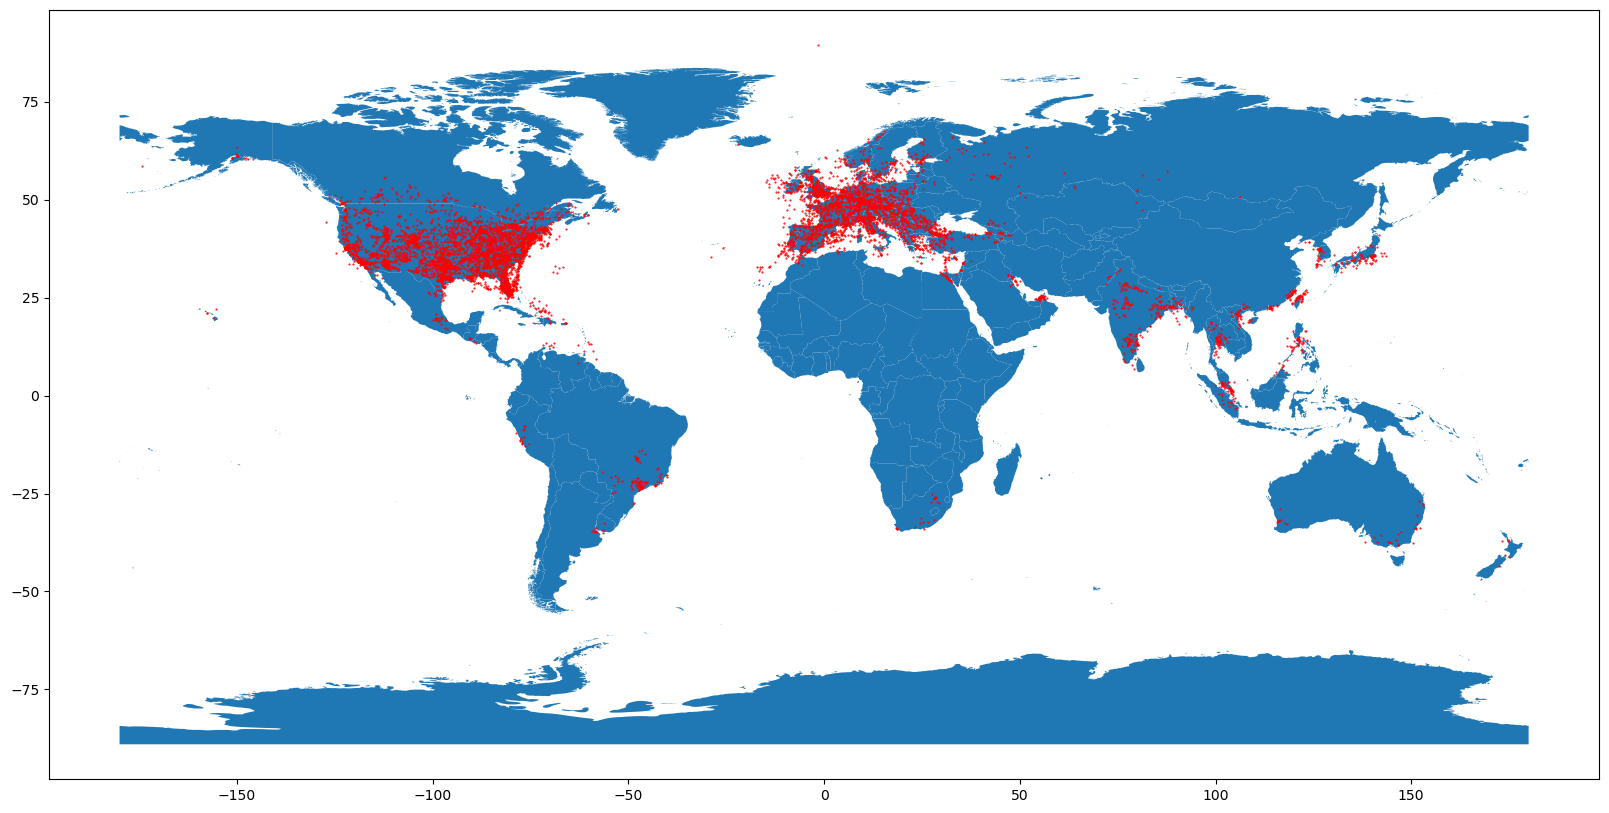

In [30]:
# let's do a globe map of all positions!
f,ax = plt.subplots(figsize=(20,10))
gdf = gpd.read_file("data/World_Countries").to_crs("wgs84")
gdf.plot(ax = ax)
# now add all of the flight lat/lng
plt.plot(df.longitude,df.latitude,"r.",markersize=1)